In [1]:
import tensorflow
import numpy as np
import pandas as pd
import os
import tensorflow.keras as keras
import h5py
zip_file=keras.utils.get_file(
    fname="gamma_angle_position_5deg_xy.h5",
    origin="https://zenodo.org/record/846388/files/gamma_angle_position_5deg_xy.h5?download=1",
    extract=True

)
dirnam=os.path.join(os.path.dirname(zip_file), "gamma_angle_position_5deg_xy.h5")
zip_file


2060006240/2060006240 [==============================] - 61s 0us/step


'/root/.keras/datasets/gamma_angle_position_5deg_xy.h5'

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


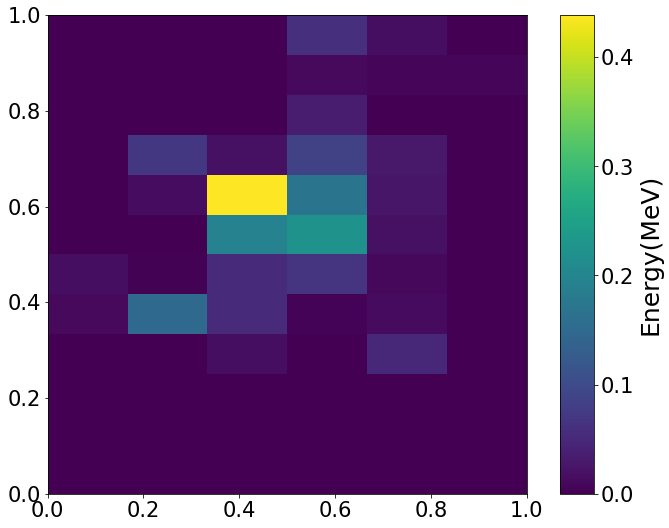

In [13]:
#Data Example with Colorbar
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib as mpl
mpl.rc('font', family='Helvetica')
fig = plt.figure(1, (45,15))
grid = AxesGrid(fig, 142,
                    nrows_ncols=(1, 1),
                    axes_pad=12,
                    share_all=True,
                    cbar_mode="each",
                    cbar_size="7%",
                    cbar_pad="7%",
                    )
n=25
#im0=grid[0].imshow(layer_0_data[n]/100,aspect="auto",extent=(0,1,0,1))
#im1=grid[0].imshow(layer_1_data[n]/100,aspect="auto",extent=(0,1,0,1))
im2=grid[0].imshow(layer_2_data[n]/100,aspect="auto", extent=(0,1,0,1))

# Set font size of tick labels to 15
grid[0].tick_params(labelsize=21)

# Get reference to Axes object for colorbar
cbar_ax = grid.cbar_axes[0]

# Set font size of colorbar tick labels to 15
cbar_ax.tick_params(labelsize=21)

# Set font size of colorbar label to 20
cbar_ax.yaxis.label.set_size(25)

#grid.cbar_axes[0].colorbar(im0,label="Energy(MeV)",ticks=np.arange(0,np.max(layer_0_data[n]),5))
#grid.cbar_axes[0].colorbar(im1,label="Energy(MeV)",ticks=np.arange(0,np.max(layer_1_data[n]),50))
grid.cbar_axes[0].colorbar(im2,label="Energy(MeV)",ticks=np.arange(0,np.max(layer_2_data[n]),0.1))
plt.draw()
plt.show()


In [3]:
#Data Import
layer_0_data = (np.array(h5py.File(zip_file)["layer_0"][:]))
layer_1_data = (np.array(h5py.File(zip_file)["layer_1"][:]))
layer_2_data = (np.array(h5py.File(zip_file)["layer_2"][:]))
energy=(np.array(h5py.File(zip_file)["energy"]))
energy=energy.reshape(energy.shape[0])
print(layer_0_data.shape)

nrm_l0=np.max(layer_0_data)
nrm_l1=np.max(layer_1_data)
nrm_l2=np.max(layer_2_data)
nrm_e=np.max(energy)


Layer_0_data_preprocessed=layer_0_data/nrm_l0
Layer_1_data_preprocessed=layer_1_data/nrm_l1
Layer_2_data_preprocessed=layer_2_data/nrm_l2
energy = energy / nrm_e


(500000, 3, 96)


In [4]:
Layer_0_data_preprocessed

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 2.40711802e-07, 2.90011534e-07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.44887283e-06, 1.92491792e-05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.32958062e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.24407611e-05, 1.08539811e-04, 1.65105335e-07]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.25305227e-04, ...,
         4.21652981e-05, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e

In [18]:
#DNN Preprocess-1
flatten_layer_0=Layer_0_data_preprocessed.reshape(500000,3*96)
flatten_layer_1=Layer_1_data_preprocessed.reshape(500000,12*12)
flatten_layer_2=Layer_2_data_preprocessed.reshape(500000,6*12)
#from random import randint
#random_selection=np.array([x for x in range (500000) if x not in random])

In [19]:
#Train Test Split 
from sklearn.model_selection import train_test_split
layer_0_train, layer_0_test, energy_train, energy_test,  layer_1_train,layer_1_test, layer_2_train, layer_2_test,= train_test_split(flatten_layer_0,  energy, flatten_layer_1, flatten_layer_2,  test_size=0.4, random_state=42)
layer_0_train_2D, layer_0_test_2D, energy_train, energy_test,  layer_1_train_2D,layer_1_test_2D, layer_2_train_2D, layer_2_test2D,= train_test_split(Layer_0_data_preprocessed,  energy, Layer_1_data_preprocessed, Layer_2_data_preprocessed,  test_size=0.4, random_state=42)

In [ ]:
#DNN Preprocess-2
lc1_test=np.array([np.concatenate((layer_0_test, layer_1_test, layer_2_test),axis=1)  ])
lc1_train=np.array([np.concatenate((layer_0_train, layer_1_train, layer_2_train),axis=1)  ])
lc1_train=lc1_train.reshape(lc1_train.shape[1],lc1_train.shape[2])
lc1_test=lc1_test.reshape(lc1_test.shape[1],lc1_test.shape[2])

In [21]:
#Model Run Mechanism
def run_experiment(model, x_train, y_train):
    
    model.compile(
        optimizer=keras.optimizers.Adam(0.003),
        loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")#,
    )
    
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=50, restore_best_weights=True
    )
    
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=50,
        batch_size=2028,
        validation_split=0.2,
        callbacks=[early_stopping],
    )
    return history

In [22]:
#DNN
import keras.layers as layers
import tensorflow as tf
hidden_units = [1024, 512,64]
def dnn(hidden_units, num_classes, dropout_rate):
    inputs = layers.Input(shape=(144+(96*3)+72,), name="input_features")
    x = inputs
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
        x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="dnn")


dnn_model = dnn(hidden_units, 1, 0)
dnn_model.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 504)]            0         
                                                                 
 dense (Dense)               (None, 1024)              517120    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0       

In [23]:
#CNN
def cnn(hidden_units, num_classes, dropout_rate):
    inputs0 = layers.Input(shape=(3,96,1,), name="input_features_l0")
    inputs1 = layers.Input(shape=(12,12,1,), name="input_features_l1")
    inputs2 = layers.Input(shape=(12,6,1,), name="input_features_l2")
    cnn0 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs0)
    cnn0 = layers.Conv2D(64, 3, activation='relu')(cnn0)
    # cnn0 = layers.Conv2D(64, 5, activation='relu')(cnn0)
    cnn0 = layers.Flatten()(cnn0)
    inputs0_flat = layers.Flatten()(inputs0)
    cnn0Comb = layers.Concatenate()([cnn0,inputs0_flat])
    cnn1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs1)
    cnn1 = layers.Conv2D(64, 3, activation='relu')(cnn1)
    cnn1 = layers.Conv2D(128, 5, activation='relu')(cnn1)
    cnn1 = layers.Flatten()(cnn1)
    inputs1_flat = layers.Flatten()(inputs1)
    cnn1Comb = layers.Concatenate()([cnn1,inputs1_flat])
    cnn2 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs2)
    cnn2 = layers.Conv2D(64, 3, activation='relu')(cnn2)  
    cnn2 = layers.Conv2D(128, 3, activation='relu')(cnn2)      
    cnn2 = layers.Flatten()(cnn2)
    inputs2_flat = layers.Flatten()(inputs2)
    cnn2Comb = layers.Concatenate()([cnn2,inputs2_flat])
    x =  layers.Concatenate()([cnn0Comb,cnn1Comb,cnn2Comb])
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
       # x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=(inputs0,inputs1,inputs2), outputs=logits, name="cnn")

In [24]:
cnn_model = cnn(hidden_units, 1, 0.1)
cnn_model.summary()

Model: "cnn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features_l1 (InputLayer)  [(None, 12, 12, 1)]  0          []                               
                                                                                                  
 input_features_l2 (InputLayer)  [(None, 12, 6, 1)]  0           []                               
                                                                                                  
 input_features_l0 (InputLayer)  [(None, 3, 96, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 12, 12, 32)   320         ['input_features_l1[0][0]']      
                                                                                                

In [25]:
#DNN Training
x_train=lc1_train
y_train=energy_train
history_dnn=run_experiment(dnn_model, x_train,y_train)

Epoch 1/50
119/119 [==============================] - 3s 18ms/step - loss: 0.0202 - val_loss: 6.8074e-04
Epoch 2/50
119/119 [==============================] - 2s 14ms/step - loss: 3.6802e-04 - val_loss: 1.7861e-04
Epoch 3/50
119/119 [==============================] - 2s 15ms/step - loss: 1.4574e-04 - val_loss: 8.9791e-05
Epoch 4/50
119/119 [==============================] - 2s 15ms/step - loss: 9.4048e-05 - val_loss: 6.3192e-05
Epoch 5/50
119/119 [==============================] - 2s 15ms/step - loss: 7.7034e-05 - val_loss: 5.3095e-05
Epoch 6/50
119/119 [==============================] - 2s 14ms/step - loss: 6.9413e-05 - val_loss: 4.8797e-05
Epoch 7/50
119/119 [==============================] - 2s 15ms/step - loss: 6.5723e-05 - val_loss: 4.5928e-05
Epoch 8/50
119/119 [==============================] - 2s 14ms/step - loss: 6.3463e-05 - val_loss: 4.4843e-05
Epoch 9/50
119/119 [==============================] - 2s 15ms/step - loss: 6.1956e-05 - val_loss: 4.3791e-05
Epoch 10/50
119/119 [==

In [26]:
#CNN Training
history_cnn=run_experiment(cnn_model,[layer_0_train_2D,layer_1_train_2D,layer_2_train_2D],energy_train)

Epoch 1/50
119/119 [==============================] - 36s 277ms/step - loss: 0.2967 - val_loss: 1.5766e-04
Epoch 2/50
119/119 [==============================] - 31s 263ms/step - loss: 1.1443e-04 - val_loss: 6.4419e-05
Epoch 3/50
119/119 [==============================] - 31s 261ms/step - loss: 7.5967e-05 - val_loss: 5.0914e-05
Epoch 4/50
119/119 [==============================] - 31s 262ms/step - loss: 6.7333e-05 - val_loss: 4.6689e-05
Epoch 5/50
119/119 [==============================] - 31s 260ms/step - loss: 6.3911e-05 - val_loss: 4.4304e-05
Epoch 6/50
119/119 [==============================] - 31s 259ms/step - loss: 6.2057e-05 - val_loss: 4.4389e-05
Epoch 7/50
119/119 [==============================] - 31s 260ms/step - loss: 6.0830e-05 - val_loss: 4.3072e-05
Epoch 8/50
119/119 [==============================] - 31s 259ms/step - loss: 5.9999e-05 - val_loss: 4.5081e-05
Epoch 9/50
119/119 [==============================] - 31s 260ms/step - loss: 5.9335e-05 - val_loss: 4.2102e-05
Epoch

In [27]:
#Model Predictions
cnn_predict = cnn_model.predict(x=[layer_0_test_2D,layer_1_test_2D,layer_2_test2D], verbose=1)
dnn_predict = dnn_model.predict(x=lc1_test, verbose=1)

6250/6250 [==============================] - 10s 2ms/step


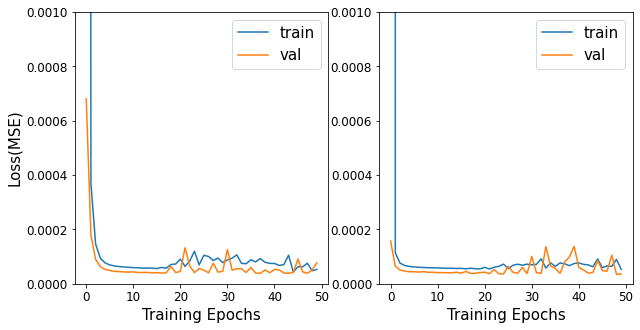

In [39]:
#Training Curves
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(history_dnn.history["loss"])
ax[0].plot(history_dnn.history["val_loss"])
ax[0].legend(["train", "val"],fontsize=15, loc="upper right")
ax[0].set_xlabel("Training Epochs",fontsize=15)
ax[0].set_ylabel("Loss(MSE)", fontsize=15)
ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[1].plot(history_cnn.history["loss"])
ax[1].plot(history_cnn.history["val_loss"])
ax[1].legend(["train", "val"],fontsize=15, loc="upper right")
ax[1].set_xlabel("Training Epochs",fontsize=15)
ax[1].set_ylim(top  = 0.001, bottom = 0.0)
ax[0].set_ylim(top  = 0.001, bottom = 0.0)
plt.show()

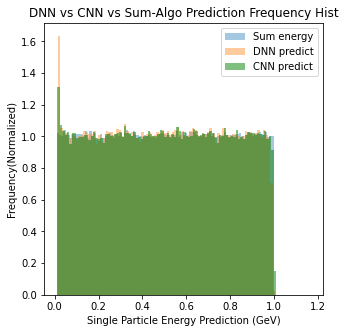

In [35]:
#Prediction Histogram
energy = np.array(energy)
dnn_predict = np.array(dnn_predict)
cnn_predict = np.array(cnn_predict)
fig, ax = plt.subplots(1,1,figsize=[5,5])
ax.hist(energy,bins= 100, density= True,alpha=0.4, label="Sum energy") 
ax.hist(dnn_predict,bins= 100, density = True ,alpha=0.4, label="DNN predict")
ax.hist(cnn_predict,bins= 100, density = True,alpha=0.5, color="g", label="CNN predict")
ax.set_xlabel("Single Particle Energy Prediction (GeV)")
ax.set_ylabel("Frequency(Normalized)")
ax.set_title("DNN vs CNN vs Sum-Algo Prediction Frequency Hist")
plt.legend()
plt.show()

In [36]:
#Energy Resolution
dnn_predict = dnn_predict.reshape(dnn_predict.shape[0])
energy_cut  = 0 / (nrm_e * 1000)
dnn_diff_pred = (dnn_predict[energy_test>energy_cut] - energy_test[energy_test>energy_cut])/ energy_test[energy_test>energy_cut]
diff_sum = (np.sum(layer_0_test[energy_test>energy_cut],axis=1)*nrm_l0+np.sum(layer_1_test[energy_test>energy_cut],axis=1)*nrm_l1+np.sum(layer_2_test[energy_test>energy_cut],axis=1)*nrm_l2 - energy_test[energy_test>energy_cut]*nrm_e*1000 + 0.0068*energy_test[energy_test>energy_cut]*nrm_e*1000)/(energy_test[energy_test>energy_cut]*nrm_e*1000)
print(np.argmin(diff_sum))
print(np.sum(diff_sum>0))
print(np.std(dnn_diff_pred))
print(np.std(diff_sum))
print(np.mean(dnn_diff_pred))
print(np.mean(diff_sum))

104028
145430
0.025423336026229953
0.012249898073222111
-0.014381871465063405
-6.856688916029345e-06


In [31]:
cnn_diff_pred=np.array([cnn_predict]).reshape(cnn_predict.shape[0])

In [32]:
#CNN Energy Resolution
cnn_diff_predict=(cnn_diff_pred[energy_test>energy_cut]-energy_test[energy_test>energy_cut])/energy_test[energy_test>energy_cut]

In [ ]:
#Energy Resolution Plots
fig, ax = plt.subplots(1,1,figsize=[7,5])
ax.hist(dnn_diff_pred, bins = 100, range=[-0.03,0.03], label = "DNN ") 
ax.hist(diff_sum, alpha = 0.6, bins = 100, range=[-0.03,0.03], label = "Sum-Algo ", color="r")
ax.hist(cnn_diff_predict,  bins = 100, range=[-0.03,0.03],color="g", label = "CNN ")
import matplotlib.pyplot as plt
from matplotlib.text import Text
ylabel = Text(s='Frequency', fontsize=15)
ax.set_ylabel(ylabel)

# Use the Text class to customize the tick marks
tick_params = Text(fontsize=12)
ax.tick_params(labelsize=tick_params)

# Use the Text class to customize the xlabel
xlabel = Text(s=r"E_$\mathrm{Resolution}$", fontsize=15)
ax.set_xlabel(xlabel)

# Use the Text class to customize the legend
legend = Text(fontsize=15)
ax.legend(fontsize=legend)

# Show the plot
plt.show()
